In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import pandas as pd     # Data frame manipulation # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np; np.random.seed(0)     # Data frame operations # linear algebra
import datetime as dt   # Date operations
import seaborn as sns; sns.set_theme()
import math

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os               # File management
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-12m-songs/tracks_features.csv


## Spotify Songs Data Analysis

After performing EDA(Exploratory Data Analysis), We will be answering the following Questions-

*Q1: Is Liveness affected by Loudness?*

*Q2: What is the most frequent duration of songs having high danceability?*

*Q3: Has there been a change in tempo of older released songs as compared to latest songs?*

            . . . Fetching Data into Dataset

In [2]:
df=pd.read_csv("/kaggle/input/spotify-12m-songs/tracks_features.csv")
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.47,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02


Checking for NULL values in data and list all columns.

In [3]:
df.isnull().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

Count and remove zeros from year column.  
*Zero* means that there is a value, space is allocated for it, and its value is zero.  
*Null* means that there is no space allocated and therefore there is no value. 

In [5]:
zero_count = (df['year']==0).sum()
zero_count  #10
#  18  valence           1204025 non-null  float64
#  19  tempo             1204025 non-null  float64
#  20  duration_ms       1204025 non-null  int64  
#  21  time_signature    1204025 non-null  float64
#  22  year              1204025 non-null  int64  
#  23  release_date      1204025 non-null  object 
df=df[df['year']!= 0]  # There were no nulls but there are 10 zeros?
zero_count2 = (df['year']==0).sum()
#  18  valence           1204015 non-null  float64
#  19  tempo             1204015 non-null  float64
#  20  duration_ms       1204015 non-null  int64  
#  21  time_signature    1204015 non-null  float64
#  22  year              1204015 non-null  int64  
#  23  release_date      1204015 non-null  object 
zero_count2  #0

0

In [6]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06,1.204015e+06
mean,7.656370e+00,1.055906e+00,4.930543e-01,5.095364e-01,5.194149e+00,-1.180868e+01,6.714617e-01,8.438210e-02,4.467538e-01,2.828572e-01,2.016000e-01,4.279847e-01,1.176344e+02,2.488405e+05,3.832493e+00,2.007344e+03
std,5.994993e+00,2.953764e-01,1.896684e-01,2.946847e-01,3.536735e+00,6.982149e+00,4.696819e-01,1.159917e-01,3.852011e-01,3.762835e-01,1.804595e-01,2.704841e-01,3.093708e+01,1.622108e+05,5.611847e-01,1.062889e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,1.900000e+03
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740925e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243410e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


array([[<AxesSubplot:title={'center':'track_number'}>,
        <AxesSubplot:title={'center':'disc_number'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

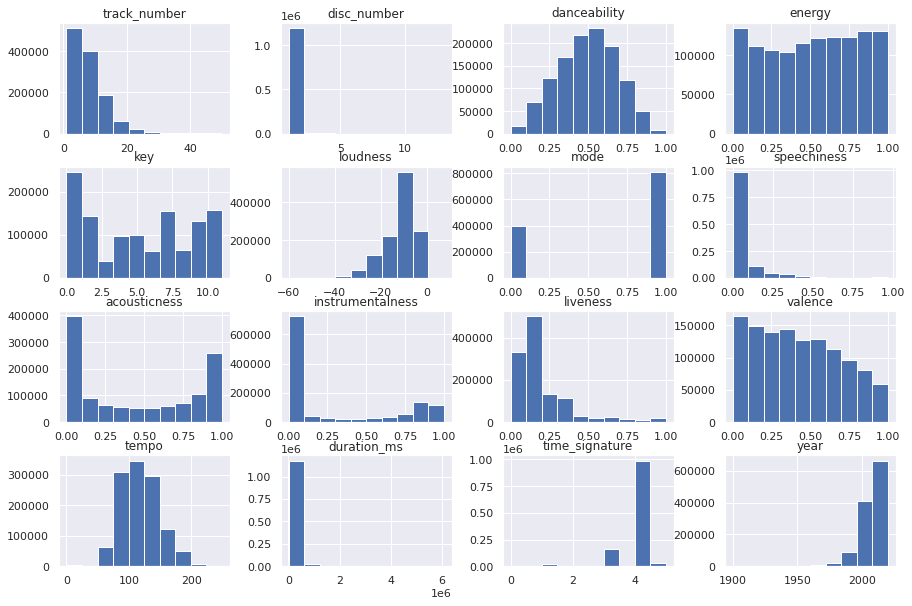

In [7]:
df.hist()

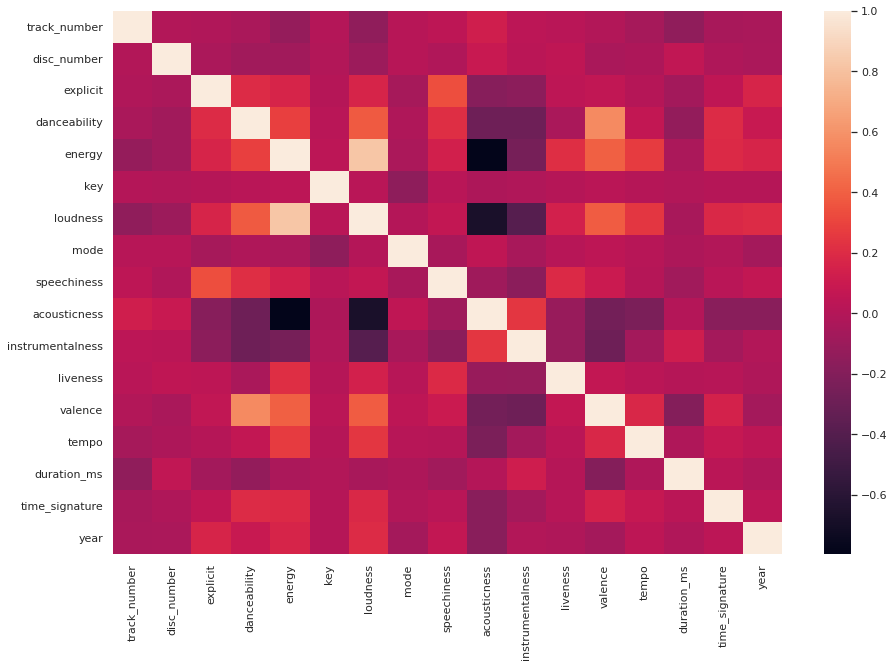

In [8]:
ax = sns.heatmap(df.corr())  #  Pandas dataframe.corr () is used to find the pairwise correlation of all columns in the dataframe.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).  
Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.   
Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.  
Speechiness: Speechiness detects the presence of spoken words in a track.  

*Appears to show correlation > Valence & Danceability; Loudness & Energy; Speechiness & Explicitness;
*Appears to show negative (or is it no?) correlation > acousticness & loudness/energy

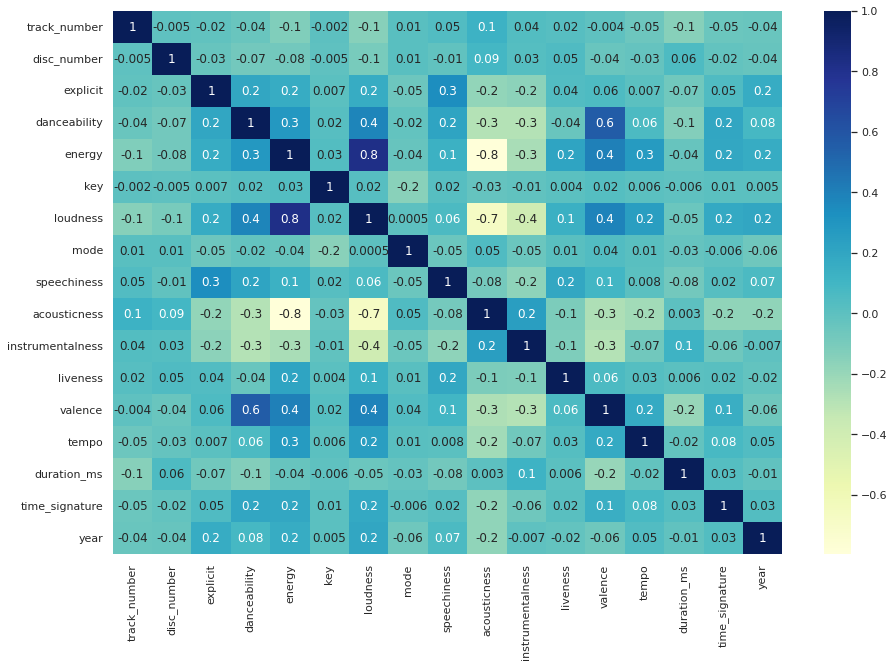

In [9]:
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="YlGnBu",);

<Figure size 720x432 with 0 Axes>

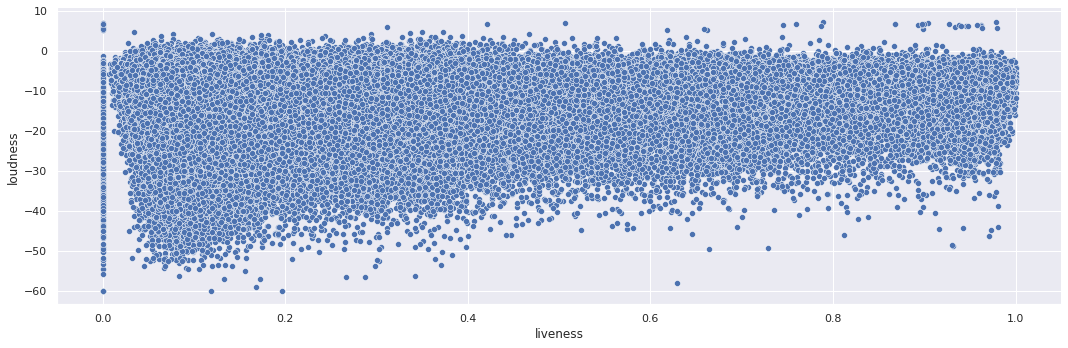

In [10]:
# Relation of Liveness with Loudness
fig = plt.figure(figsize = (10,6))
sns.relplot(x="liveness", y="loudness", aspect=3, kind="scatter", data=df)

Q - Is Liveness affected by Loudness?

A - First define terms;
apply domain knowledge influenced reasoning to develop theory;
compare with data;

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db. 

So loudness avg may be brought up by short noisy outbursts.  This small positive correlation may be visible in the plot.  Hypothesis: softer musical tracks are effected more by audience noise than louder tracks.  If we take into account things typical of louder music and separate say, instrumental and electric music, it may expose more information.  
I'd like to see percent of zero values in this df and explain this zero liveness.  If its all non-live tracks then they could be removed.

We can see at high loudness liveness makes no difference but as liveness goes up from a rating of 0.01 - 1.0 at loudnesses between -30 - -50  there we can see the effect of audience on loudness.  If we can see the density better we might see an clear difference between lower loudness and already noisy tracks.  Also breaking the graph into distinct db ranges and generating avg lines within those we may see more.

Result: Neither line nor simple scatter plot are sufficient to determine exact nature of relationship between Liveness and Loudness, but some correlation is known.

<Figure size 720x432 with 0 Axes>

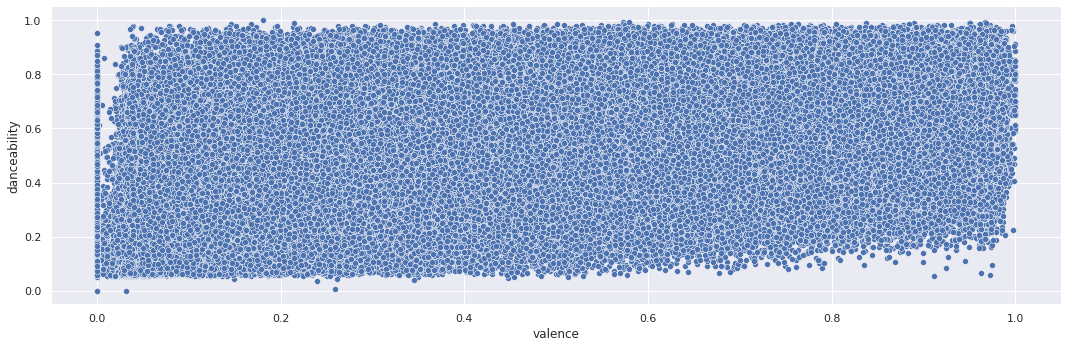

In [11]:
# Relation of Valence with Danceability
fig = plt.figure(figsize = (10,6))
sns.relplot(x="valence", y="danceability", aspect=3, kind="scatter", data=df)

Q - Is Danceability affected by Valence?

A - A different type of plot is needed.  Zero or low valence tracks seem to be the majority.  What plot will show the numbers?  Valence between .3 - .65 shows an increase of danceability correlated with being more cheerful yet this isnt the entire picture.  How often are there dark dance songs? It looks like more of the best are dark but maybe not the most.  Usually non-happy songs are not danceable.  Usually happy songs are.  Need another way to plot. 

Reason -



In [ ]:
# Relation of Valence with Danceability 
fig = plt.figure(figsize = (10,6))
sns.relplot(x="valence", y="danceability", aspect=1, kind="line", data=df)

In [ ]:
# Relation of Loudness with Energy  (0.8)
fig = plt.figure(figsize = (10,6))
sns.relplot(x="loudness", y="energy", aspect=1, kind="line", data=df)

KeyboardInterrupt: 

<Figure size 720x432 with 0 Axes>

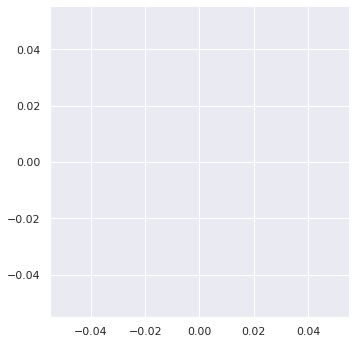

In [14]:
# Relation of Acousticness with Energy  (-0.8)
fig = plt.figure(figsize = (10,6))
sns.relplot(x="acousticness", y="energy", aspect=1, kind="line", data=df)